In [1]:
import numpy as np
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader, Subset
from node_perturbation.node_perturbation import NPLinear, NPConv2d
from node_perturbation.utils import np_train
from decorrelation.decorrelation import Decorrelation
import matplotlib.pyplot as plt
import argparse

# automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

In [2]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Grayscale(1),
        transforms.Normalize((0.5), (0.5)),
        torch.flatten # for input to linear layer
        ])

train_data = MNIST(root='~/Data', train=True, download=True, transform=transform)
train_data = Subset(train_data, np.random.permutation(len(train_data.data))[:1000])
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0, drop_last=True)

test_data = MNIST(root='~/Data', train=False, download=True, transform=transform)
test_data = Subset(test_data, np.random.permutation(len(test_data.data))[:1000])
test_loader = DataLoader(test_data, batch_size=64, shuffle=True, num_workers=0, drop_last=True)

In [3]:
args = argparse.Namespace(lr=1e-4, decor_lr=1e-1, kappa=1e-2, epochs=50)
    
lossfun = torch.nn.CrossEntropyLoss().to(device)

sampler = torch.distributions.Distribution = torch.distributions.Normal(loc=0.0, scale=1e-3)

model = NPLinear(784, 10, sampler=sampler, device=device)
model, L1, D, T = np_train(args, model, lossfun, train_loader, test_loader, device)

model = nn.Sequential(Decorrelation(784, decor_lr=args.decor_lr, kappa=args.kappa), NPLinear(784, 10, sampler=sampler, device=device))
model, L2, D, T = np_train(args, model, lossfun, train_loader, test_loader, device)



epoch 0  	time:0.000 s	np loss: 5.125478	decorrelation loss: 0.000000	test loss: 2.554646
epoch 1  	time:0.108 s	np loss: 5.103959	decorrelation loss: 0.000000	test loss: 2.531429
epoch 2  	time:0.107 s	np loss: 5.110357	decorrelation loss: 0.000000	test loss: 2.543232
epoch 3  	time:0.112 s	np loss: 5.095614	decorrelation loss: 0.000000	test loss: 2.527165
epoch 4  	time:0.115 s	np loss: 5.065486	decorrelation loss: 0.000000	test loss: 2.493778
epoch 5  	time:0.116 s	np loss: 4.988765	decorrelation loss: 0.000000	test loss: 2.467682
epoch 6  	time:0.113 s	np loss: 4.953206	decorrelation loss: 0.000000	test loss: 2.454337
epoch 7  	time:0.112 s	np loss: 4.941913	decorrelation loss: 0.000000	test loss: 2.452537
epoch 8  	time:0.110 s	np loss: 4.947263	decorrelation loss: 0.000000	test loss: 2.450777
epoch 9  	time:0.107 s	np loss: 4.892523	decorrelation loss: 0.000000	test loss: 2.424196
epoch 10 	time:0.106 s	np loss: 4.868748	decorrelation loss: 0.000000	test loss: 2.422161
epoch 11 	

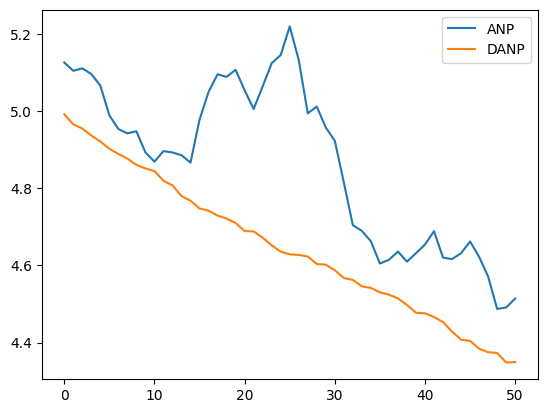

In [4]:
plt.plot(L1)
plt.plot(L2)
plt.legend(['ANP', 'DANP']);

Node perturbation for convolutional layers

In [5]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Grayscale(1),
        transforms.Normalize((0.5), (0.5)),
        ])

train_data = MNIST(root='~/Data', train=True, download=True, transform=transform)
train_data = Subset(train_data, np.random.permutation(len(train_data.data))[:1000])
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0, drop_last=True)

test_data = MNIST(root='~/Data', train=False, download=True, transform=transform)
test_data = Subset(test_data, np.random.permutation(len(test_data.data))[:1000])
test_loader = DataLoader(test_data, batch_size=64, shuffle=True, num_workers=0, drop_last=True)

In [6]:
args = argparse.Namespace(lr=1e-4, decor_lr=1e-1, kappa=1e-2, epochs=50, kernel_size=[3, 3])
    
lossfun = torch.nn.CrossEntropyLoss().to(device)

sampler = torch.distributions.Distribution = torch.distributions.Normal(loc=0.0, scale=1e-3)

model = nn.Sequential(NPConv2d(in_channels=1, out_channels=5, kernel_size=args.kernel_size, sampler=sampler, device=device),
                      nn.LeakyReLU(),
                      NPLinear(3380, 10, sampler=sampler, device=device))
model, L1, D, T = np_train(args, model, lossfun, train_loader, test_loader, device)

model = nn.Sequential(Decorrelation(784, decor_lr=args.decor_lr, kappa=args.kappa),
                      NPConv2d(in_channels=1, out_channels=5, kernel_size=args.kernel_size, sampler=sampler, device=device),
                      nn.LeakyReLU(),
                      NPLinear(3380, 10, sampler=sampler, device=device))
model, L2, D, T = np_train(args, model, lossfun, train_loader, test_loader, device)

epoch 0  	time:0.000 s	np loss: 4.960639	decorrelation loss: 0.000000	test loss: 2.490276
epoch 1  	time:0.307 s	np loss: 4.986118	decorrelation loss: 0.000000	test loss: 2.512982
epoch 2  	time:0.308 s	np loss: 5.052473	decorrelation loss: 0.000000	test loss: 2.585860
epoch 3  	time:0.300 s	np loss: 5.151894	decorrelation loss: 0.000000	test loss: 2.638351
epoch 4  	time:0.301 s	np loss: 5.247044	decorrelation loss: 0.000000	test loss: 2.697188
epoch 5  	time:0.304 s	np loss: 5.321915	decorrelation loss: 0.000000	test loss: 2.714668
epoch 6  	time:0.303 s	np loss: 5.316881	decorrelation loss: 0.000000	test loss: 2.684492
epoch 7  	time:0.291 s	np loss: 5.269386	decorrelation loss: 0.000000	test loss: 2.679648
epoch 8  	time:0.292 s	np loss: 5.283481	decorrelation loss: 0.000000	test loss: 2.689086
epoch 9  	time:0.295 s	np loss: 5.231140	decorrelation loss: 0.000000	test loss: 2.667997
epoch 10 	time:0.294 s	np loss: 5.219678	decorrelation loss: 0.000000	test loss: 2.690369
epoch 11 	

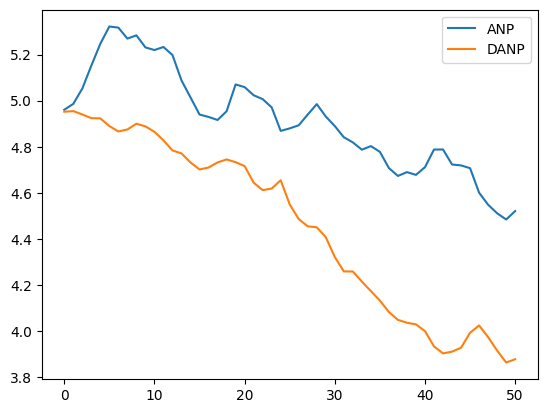

In [7]:
plt.plot(L1)
plt.plot(L2)
plt.legend(['ANP', 'DANP']);